# Importing Necesary Libraries

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
data = datasets.load_iris() #Loading iris dataset
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = data.data
Y = data.target
output_labels = data.target_names
features = np.array(data.feature_names)

In [4]:
X_train ,X_test , y_train , y_test  = train_test_split(X,Y,test_size=0.25 , random_state=0) #Performing train test split

In [5]:
def entropy(partition):
    possible_class = set(partition)
    total_entropy = 0
    for item in possible_class:
        n = partition[partition == item].shape[0]
        total_entropy += (-1*(n/partition.shape[0])*np.log2((n/partition.shape[0])))
        
    
    return total_entropy  
#entropy function calculates entropy for different classes present in a node
    
def information_req(n,m,left_entropy,right_entropy):
    return ((n/(n+m))*left_entropy + (m/(n+m))*right_entropy)

#Information_req function calculates weighted average of entropies caused due to the binary split.
#It recieves entropy of left and right node as an input.

def splitinfo(n,m):
    
    return (-1*(n/(n+m))*np.log10(n/(n+m)) + ((-1*m)/(n+m))*np.log10(m/(n+m)))

#Splitinfo function calculates the split info which penalizes small splits that cause overfitting.

def DecisionTreeClassifer(x,y,features,u):
    classes = set(np.sort(y))
    
#     print(len(features))
    print("Level : ",u)  #printing level of node
    for item in classes :       #prints count of each class present within the node.
        count = y[y == item].shape[0]
        print("Count of {} : ".format(item) , count)
        
    entropy_at_level = entropy(y) #calculates entropy
    print("Current Entropy is : ",entropy_at_level)
    
    if len(classes) == 1 or len(features) == 0: #base case
        print("Reached Leaf Node")
        print("*"*50)
        return
    else:
        conditions = {}        #conditions maintain the features over which split can occur along with corresponding value of split
        entropies = {}        #entropies maintain the features over which split can occur alonh with corresponding minimum entropy
        for i in range(len(features)):
            col = np.array(list(set(x[:,i].ravel())) ,dtype = "float64" )#finding unique continuous values in the feature selected
            col_sort = np.sort(col)
            middle_points = []
            for j in range(len(col_sort) -1):
                middle_points.append((col_sort[j] + col_sort[j+1])/2)  #Finding middle values of unique values

            x_col = x[:,i].ravel()

            min_info = 2000 
            value = 0
            once = False
            for val in middle_points:        #This loop finds best split value over which information required is minimum
                bool_arr1 = x_col <= val     #for the selected feature
                bool_arr2 = x_col > val

                left = y[bool_arr1]
                left_entropy = entropy(left)
                right = y[bool_arr2]
                right_entropy = entropy(right)
                info = information_req(left.shape[0],right.shape[0],left_entropy , right_entropy)
                if info < min_info :
                    min_info = info
                    value = val
                    
            conditions[features[i]] = value      #storing best split value coreesponding feature name
            entropies[features[i]] = min_info    #toring minimum information required and corresponding feature name
            
        min_entropy = 2000
        feature = 0
        
        for item in entropies:                  #This loop find best feature from the available features with 
            if entropies[item] < min_entropy:   #minimum information required.
                min_entropy = entropies[item]
                feature = item
                
        k = np.where(features == feature)[0][0]  #position of selected feature 

        left_y = y[np.where(x[:,k] <= conditions[feature])] #left partition of output
        left_part = np.delete(x[np.where(x[:,k] <= conditions[feature])],k,axis = 1 )  #Deleting selected feature from left partition
        right_y = y[np.where(x[:,k] > conditions[feature])]  #right partition of output
        right_part = np.delete(x[np.where(x[:,k] > conditions[feature])],k,axis = 1 )  #Deleting selected feature from right partition
        
        len_left = left_part.shape[0]
        len_right = right_part.shape[0]
        split_val = splitinfo(len_left,len_right)  #Calculating spliti info
                
        gain_ratio = (entropy_at_level - min_entropy)/split_val  #Calculation of gain ratio
        
        print("Splitting on feature {} with gain ratio : ".format(feature),gain_ratio)

        print("*"*50)
        

        DecisionTreeClassifer(left_part , left_y , np.delete(features,k),u+1)    #recursive call leftwords
        DecisionTreeClassifer(right_part , right_y , np.delete(features,k),u+1)  #recursive call rightwords
            
                
                
                
                    
                
            

In [6]:
#output
DecisionTreeClassifer(X_train , y_train , features,0) #Calling function

Level :  0
Count of 0 :  37
Count of 1 :  34
Count of 2 :  41
Current Entropy is :  1.5807197138422102
Splitting on feature petal length (cm) with gain ratio :  3.3219280948873617
**************************************************
Level :  1
Count of 0 :  37
Current Entropy is :  0.0
Reached Leaf Node
**************************************************
Level :  1
Count of 1 :  34
Count of 2 :  41
Current Entropy is :  0.993707106604508
Splitting on feature petal width (cm) with gain ratio :  2.1959340577846946
**************************************************
Level :  2
Count of 1 :  33
Count of 2 :  4
Current Entropy is :  0.49418293484978865
Splitting on feature sepal length (cm) with gain ratio :  1.6965874447158455
**************************************************
Level :  3
Count of 1 :  33
Count of 2 :  3
Current Entropy is :  0.41381685030363374
Splitting on feature sepal width (cm) with gain ratio :  0.23281832832936553
**************************************************
Level 

In [7]:
from sklearn.tree import DecisionTreeClassifier as dt  #training uing inbuilt DecisionTreeClassifier
obj = dt()
obj.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\DELL\Desktop\Machine_Learning\env1\Lib\site-packages\Graphviz\bin'

In [9]:
#Exporting trained DecisionTreeClassifier
from sklearn.tree import export_graphviz,plot_tree
import pydotplus
dot_data = export_graphviz(obj,out_file=None,feature_names=features,class_names=output_labels)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris_submission.pdf")

True

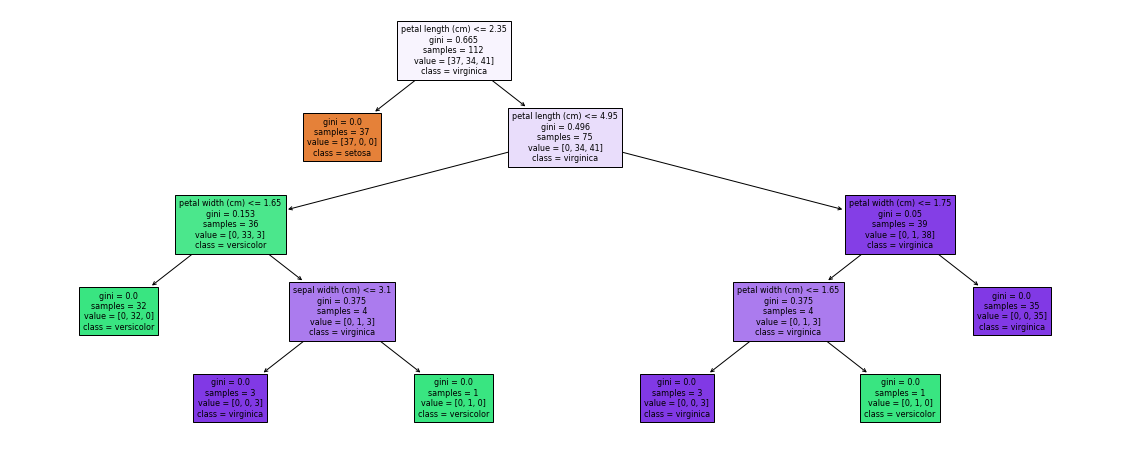

In [10]:
#Plotting Decision Tree using matplotlib and plot_tree function
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plot_tree(obj,fontsize = 8,feature_names=features , class_names=output_labels , filled=True)
plt.show()

# Now for OR Table

In [11]:
val = {"X1" : [1,0,1,0] ,
      "X2" : [1,1,0,0],
      "Y" : [1,1,1,0]}

#Here 1 --> True & 0 --> False

In [12]:
df = pd.DataFrame(val)
df

,X1,X2,Y
0,1,1,1
1,0,1,1
2,1,0,1
3,0,0,0


In [13]:
obj2 = dt()
obj2.fit(df.iloc[:,:-1],df.iloc[:,-1]) #Training the clasifier

DecisionTreeClassifier()

In [14]:
#Exporting DecisionTreeClassifier traing with OR dataset
dot_data_or = export_graphviz(obj2,out_file=None,feature_names=df.columns[:-1],class_names=["false","true"])
graph_or = pydotplus.graph_from_dot_data(dot_data_or)
graph_or.write_pdf("or_submission.pdf")

True

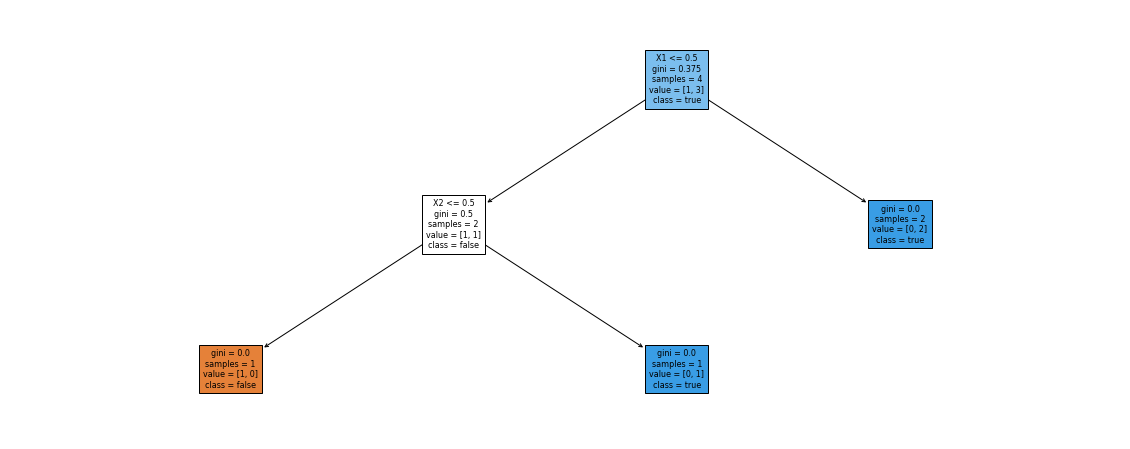

In [15]:
#Plotting OR DecisionTreeClassifier
plt.figure(figsize=(20,8))
plot_tree(obj2,fontsize = 8,feature_names=df.columns[:-1] , class_names=["false","true"] , filled=True)
plt.show()